In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from matplotlib import cm

In [101]:
def plot_3d_voxels(data, transparency_threshold=0, skew_factor=1, sampling_ratio=0.3, multi_view=True, colormap='magma',save_img=False ,channel_first=False):
    
    """
    This function visualizes 3D data (voxels) with one channel using a 3D scatter plot.

    Parameters:
    data (numpy.ndarray): A 4D numpy array representing the voxel grid.

    transparency_threshold (float): A threshold below which voxel values are considered transparent.

    skew_factor (float): A factor by which the voxel values are skewed before visualizing. 
                         This puts emphasis on higher values and suppresses lower ones. 
                         skewed_values = voxel_values ** skew_factor

    sampling_ratio (float): The ratio of non-zero voxels to sample and plot. Must be between 0 and 1.

    multi_view (boolean): Plot different views (perspective, top, bottom, front, left, right)

    colormap (string): The colormap of choice

    channel_first (boolean): Is the first dimension of your data the channel?

    save_img (boolean): Saves the plots as PDF and PNG. Change the path and file name to your liking.
    
    """

    

    # Check if the input data is a 4D numpy array
    if not isinstance(data, np.ndarray) or data.ndim != 4:
        raise ValueError("Input data must be a 4D numpy array")

    # Check if the transparency_threshold and skew_factor are valid numbers
    if not isinstance(transparency_threshold, (int, float)):
        raise ValueError("Transparency threshold must be a number")
    if not isinstance(skew_factor, (int, float)):
        raise ValueError("Skew factor must be a number")

    # Check if the sampling_ratio is a valid number between 0 and 1
    if not isinstance(sampling_ratio, (int, float)) or sampling_ratio < 0 or sampling_ratio > 1:
        raise ValueError("Sampling ratio must be a number between 0 and 1")

     # Reshape the data
    if channel_first==True:
        pass
    else:
        data = data.reshape((1, data.shape[0], data.shape[1], data.shape[2]))
     
        
    # Number of slices (z-dimension in the 3D space)
    num_slices = data.shape[-1]

    # Create figure and grid
    fig = plt.figure(figsize=(10, num_slices * 2))
    gs = gridspec.GridSpec(5, 3, height_ratios=[1] * 5, width_ratios=[1,3,1])
    ax_main = plt.subplot(gs[:, 1], projection='3d')

    # Create colormap and calculate color and transparency for non-zero voxels
    magma_cmap = cm.get_cmap(colormap)
    voxel_indices = np.argwhere(data > 0)
    voxel_values = data[data > 0] / np.max(data)
    
    # Random sampling of non-zero points
    sampled_indices = np.random.choice(np.arange(voxel_indices.shape[0]), size=int(voxel_indices.shape[0] * sampling_ratio), replace=False)
    voxel_indices = voxel_indices[sampled_indices]
    voxel_values = voxel_values[sampled_indices]

    #Skew the values for visualisatin
    skewed_values = voxel_values ** skew_factor
    
    colors = magma_cmap(skewed_values)
    colors[:, 3] = np.where(voxel_values > transparency_threshold, voxel_values, 0)

    # Plot the main 3D scatter plot
    ax_main.scatter(voxel_indices[:, 1], voxel_indices[:, 2], voxel_indices[:, 3], c=colors, marker='s')
    
    if multi_view==True:
        #Diffrent views 
        views = [
            {'title': 'Perspective View', 'elev': 30, 'azim': -45},
            {'title': 'Top View', 'elev': 90, 'azim': -95},
            {'title': 'Bottom View', 'elev': -90, 'azim': -95},
            {'title': 'Front View', 'elev': 5, 'azim': -85},
            {'title': 'Right View', 'elev': 5, 'azim': -20},
            {'title': 'Left View', 'elev': 5, 'azim': -160}
        ]

        # Plot the 3D different views scatter plot
        fig = plt.figure(figsize=(12, 12))
        for i, view in enumerate(views, start=1):
            ax = fig.add_subplot(2, 3, i, projection='3d')
            ax.scatter(voxel_indices[:, 1], voxel_indices[:, 2], voxel_indices[:, 3], c=colors, marker='s')
            ax.view_init(elev=view['elev'], azim=view['azim'])
            ax.set_title(view['title'])
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')
            ax.grid(False)
            ax.xaxis.pane.set_edgecolor('k')
            ax.yaxis.pane.set_edgecolor('k')
            ax.zaxis.pane.set_edgecolor('k')

            ax.xaxis.pane.set_linewidth(2)
            ax.yaxis.pane.set_linewidth(2)
            ax.zaxis.pane.set_linewidth(2)       

            ax.xaxis.pane.fill = False
            ax.yaxis.pane.fill = False
            ax.zaxis.pane.fill = False

            # Set axes limits with a small margin
            ax.set_xlim(0, data.shape[1])
            ax.set_ylim(0, data.shape[2])
            ax.set_zlim(0, data.shape[3])
    
    
    # Tight layout and show the plot
    plt.tight_layout()
    
    # Save
    if save_img==True:
        #plt.savefig('Voxel.pdf')
        plt.savefig('Voxel.png', dpi=75)
    plt.show()
    


(50, 50, 50, 1)


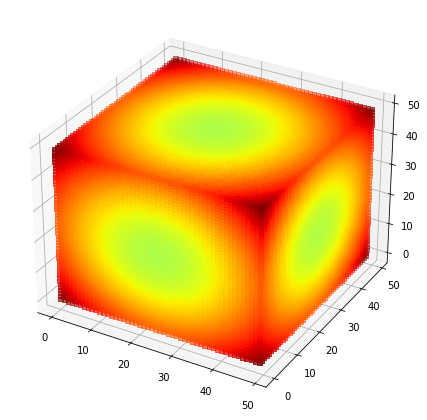

In [102]:


# Define dimensions of the cube
dim = 50

# Create a cube where the value of each voxel is the distance from the center
x = np.linspace(-1, 1, dim)
y = np.linspace(-1, 1, dim)
z = np.linspace(-1, 1, dim)
X, Y, Z = np.meshgrid(x, y, z)

# Create a cube where the value of each voxel represents the distance from the center
# This will create a color gradient from the center of the cube to the edges
distances = np.sqrt(X**2 + Y**2 + Z**2)


# Normalize distances to range between 0 and 1
normalized_distances = (distances - np.min(distances)) / (np.max(distances) - np.min(distances))

# Reshape distances to be in the format (x, y, z, channel)
data = normalized_distances.reshape((dim, dim, dim, 1))

print(data.shape)
# Use your function to plot the cube
plot_3d_voxels(data,transparency_threshold=0,skew_factor=1, sampling_ratio= 1,colormap='jet', multi_view=False, save_img=True)

#plot_3d_voxels(data)

(50, 50, 50, 1)


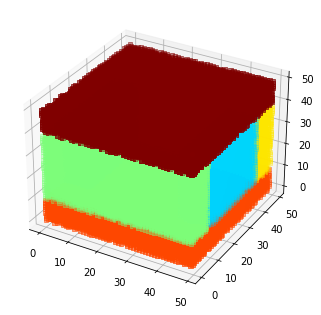

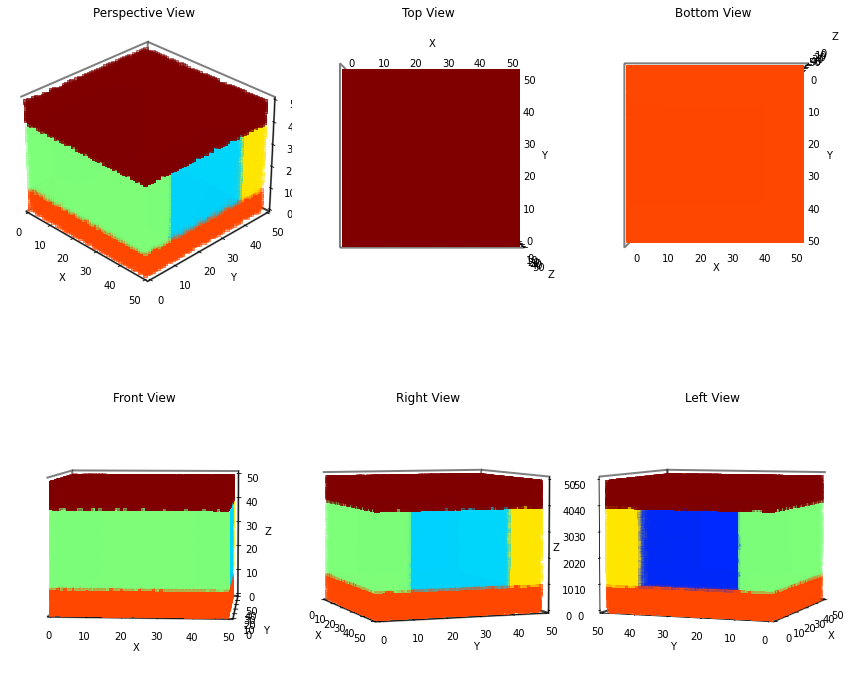

In [98]:

# Define dimensions of the cube
dim = 50

# Create an empty cube
data = np.zeros((dim, dim, dim))

# Create regions for each face, representing numbers 1-6
data[:10, :, :] = 1  # front face represents 1
data[-10:, :, :] = 2  # back face represents 2
data[:, :10, :] = 3  # left face represents 3
data[:, -10:, :] = 4  # right face represents 4
data[:, :, :10] = 5  # top face represents 5
data[:, :, -10:] = 6  # bottom face represents 6

# Add color channel dimension
data = data.reshape((dim, dim, dim, 1))


print(data.shape)
# Use your function to plot the cube

plot_3d_voxels(data,sampling_ratio=0.1,colormap='jet',save_img=True)